1408


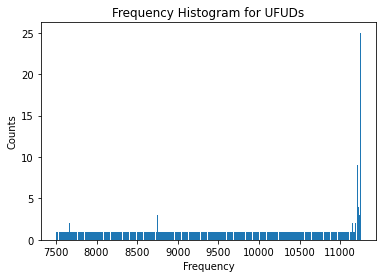

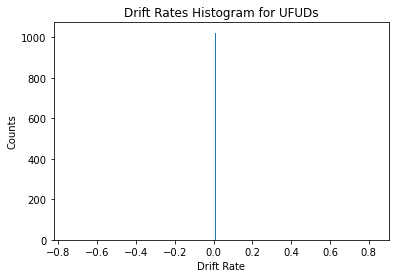

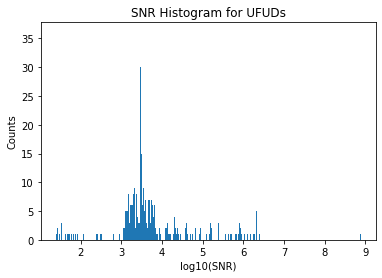

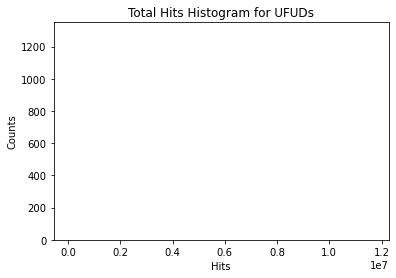

In [2]:
#In this notebook, we'll create plots from unspliced-filterbank unspliced-dat files (UFUDs)
#Ellie White, 21 Jan 2021
%matplotlib inline
import numpy as np
import pylab as plt

#first, read in the .dat files for the first scan in the cadence:

nodes_list = ['00', '01', '02', '03', '04', '05', '06', '11', \
              '12', '13', '14', '15', '16', '21', '22', '23', \
              '24', '25', '26', '27']

#this list stores frequencies for checking overlap
all_freq = []

#these arrays store data for plotting histograms
all_drifts = []
all_snr = []
all_corr_freq = []
all_hits = []

for node in nodes_list:
    filename = '/datax/scratch/ewhite/voyager-xband/dat_files/BLC{0}/fine_res/'\
               'blc{0}_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.dat'.format(node)
    #print(filename)
    infile = open(filename, 'r')
    drift_rates = []
    snr = []
    corr_freq = []
    full_num_hits = []

    for line in infile.readlines():
        if line[0] != '#':
            items = line.split()
            all_drifts.append(float(items[1].strip()))
            all_snr.append(float(items[2].strip()))
            all_corr_freq.append(float(items[4].strip()))
            all_hits.append(float(items[11].strip()))    
    
#create histograms

#number of bins
n_bins = len(all_corr_freq)
print(n_bins)

#for i in range(len(all_corr_freq)):
#    plt.hist(all_corr_freq[i], bins=n_bins, color='c')

plt.hist(all_corr_freq, bins=n_bins)
plt.xlabel('Frequency')
plt.ylabel('Counts')
plt.title('Frequency Histogram for UFUDs')
plt.savefig('/home/ewhite/voyager_histograms/ufuds_freq_hist.png', dpi=300)
plt.show()

#for j in range(len(all_drifts)):
#    plt.hist(all_drifts[j], bins=n_bins, color='c')

all_drifts = np.array(all_drifts)

plt.hist(all_drifts, bins=n_bins)
plt.xlabel('Drift Rate')
plt.ylabel('Counts')
plt.title('Drift Rates Histogram for UFUDs')
plt.savefig('/home/ewhite/voyager_histograms/ufuds_drifts_hist.png', dpi=300)
plt.show()

#for k in range(len(all_snr)):
#    plt.hist(all_snr[k], bins=n_bins, color='c')

all_snr = np.array(all_snr)

plt.hist(np.log10(all_snr), bins=n_bins)    
plt.xlabel('log10(SNR)')
plt.ylabel('Counts')
plt.title('SNR Histogram for UFUDs')
plt.savefig('/home/ewhite/voyager_histograms/ufuds_snr_hist.png', dpi=300)
plt.show()

#for l in range(len(all_hits)):
#    plt.hist(all_hits[l], bins=n_bins, color='c')

plt.hist(all_hits, bins=n_bins)  
plt.xlabel('Hits')
plt.ylabel('Counts')
plt.title('Total Hits Histogram for UFUDs')
plt.savefig('/home/ewhite/voyager_histograms/ufuds_hits_hist.png', dpi=300)
plt.show()   


In [ ]:
#verify that there are no overlapping frequencies in the .dat files
'''freq_len = len(all_freq)
freq_len = freq_len - 1'''
   
#if none of the values printed out here are negative,
#then there are no overlapping frequency ranges between
#each processed turboSETI node
'''for i in range(freq_len):
    delta = all_freq[i+1] - all_freq[i]
    print(delta)'''

In [26]:

import sys 
np.set_printoptions(threshold= sys.maxsize)

sfd_fname = '/datax/scratch/ewhite/voyager-xband/spliced_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.dat'
sfd_infile = open(sfd_fname, 'r')

s_drift_rates = []
s_snr = []
s_corr_freq = []
s_full_num_hits = []
s_coarse_chans = []
dat_info = []

for s_line in sfd_infile.readlines():
    if s_line[0] != '#':
        s_items = s_line.split()
        s_drift_rates.append(float(s_items[1].strip()))
        s_snr.append(float(s_items[2].strip()))
        s_corr_freq.append(float(s_items[4].strip()))
        s_coarse_chans.append(float(s_items[10].strip()))
        s_full_num_hits.append(float(s_items[11].strip()))
        
        for num in range(len(s_items)):
            s_items[num] = s_items[num].strip()
                
            #append each row to the 2-d dat_info array
        dat_info.append(s_items)
        
dat_info = np.array(dat_info, float)
freq_index = 4

#print(dat_info[:,10])

for d in range(1408):
    dat_info[d,4] = float(dat_info[d,4])

#dat_info[:,4].astype(float)
sorted_dat_info = dat_info[dat_info[:,freq_index].argsort()[::-1]]

print(sorted_dat_info[:,10].astype(int))
#print(sorted_dat_info[:,4])
        
#s_nbins = 100 #len(s_drift_rates)
#print(s_nbins)

#s_coarse_chans.sort()
#print(s_coarse_chans)

'''plt.hist(s_corr_freq, bins=s_nbins)
plt.xlabel('Frequency')
plt.ylabel('Counts')
plt.title('Frequency Histogram for SFDs')
plt.savefig('/home/ewhite/voyager_histograms/sfds_freq_hist.png', dpi=300)
plt.show()

plt.hist(s_drift_rates, bins=s_nbins)
plt.xlabel('Drift Rate')
plt.ylabel('Counts')
plt.title('Drift Rate Histogram for SFDs')
plt.savefig('/home/ewhite/voyager_histograms/sfds_drift_hist.png', dpi=300)
plt.show()

s_snr = np.array(s_snr)

plt.hist(np.log10(s_snr), bins=s_nbins)
plt.xlabel('log10(SNR)')
plt.ylabel('Counts')
plt.title('SNR Histogram for SFDs')
plt.savefig('/home/ewhite/voyager_histograms/sfds_snr_hist.png', dpi=300)
plt.show()

plt.hist(s_full_num_hits, bins=s_nbins)
plt.xlabel('Total Hits')
plt.ylabel('Counts')
plt.title('Total Number of Hits Histogram for SFDs')
plt.savefig('/home/ewhite/voyager_histograms/sfds_hits_hist.png', dpi=300)
plt.show()'''



[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    1    1    2
    2    2    2    2    2    3    3    3    3    3    4    4    4    4
    5    5    5    5    5    6    6    6    6    6    6    6    6    6
    6    6    6    6    7    7    7    7    8    8    8    8    8    8
    9    9    9    9    9    9   10   10   10   10   10   10   10   11
   11   11   11   11   11   12   12   13   13   13   13   13   13   13
   13   13   14   14   14   14   15   15   16   17   17   17   17   18
   18   18   18   19   19   19   20   21   21   22   23   24   24   25
   26   27   28   29   30   31   32   33   34   34   35   36   37   38
   39   40   41   42   43   44   45   46   47   48   49   50   51   52
   53   54   55   56   57   58   59   60   61   62   63   64   65   66
   67   68   68   69   70   71   72   73   74   75   76   77   78   79
   80   81   82   83   84   85   86   87   88   89   90   91   92   93
   94 

"plt.hist(s_corr_freq, bins=s_nbins)\nplt.xlabel('Frequency')\nplt.ylabel('Counts')\nplt.title('Frequency Histogram for SFDs')\nplt.savefig('/home/ewhite/voyager_histograms/sfds_freq_hist.png', dpi=300)\nplt.show()\n\nplt.hist(s_drift_rates, bins=s_nbins)\nplt.xlabel('Drift Rate')\nplt.ylabel('Counts')\nplt.title('Drift Rate Histogram for SFDs')\nplt.savefig('/home/ewhite/voyager_histograms/sfds_drift_hist.png', dpi=300)\nplt.show()\n\ns_snr = np.array(s_snr)\n\nplt.hist(np.log10(s_snr), bins=s_nbins)\nplt.xlabel('log10(SNR)')\nplt.ylabel('Counts')\nplt.title('SNR Histogram for SFDs')\nplt.savefig('/home/ewhite/voyager_histograms/sfds_snr_hist.png', dpi=300)\nplt.show()\n\nplt.hist(s_full_num_hits, bins=s_nbins)\nplt.xlabel('Total Hits')\nplt.ylabel('Counts')\nplt.title('Total Number of Hits Histogram for SFDs')\nplt.savefig('/home/ewhite/voyager_histograms/sfds_hits_hist.png', dpi=300)\nplt.show()"